<a href="https://colab.research.google.com/github/BhavyaGoyal777/NLPTasksUsingBert/blob/main/SentimentalAnalysisUsingBert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [2]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install seaborn --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 64.1 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

In [37]:
df = pd.read_csv("/content/Corona_NLP_train.csv", encoding = 'ISO-8859-1')
test = pd.read_csv("/content/Corona_NLP_test.csv", encoding = 'ISO-8859-1')

In [38]:
len(test)
len(df)

41157

In [39]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [41]:
df=df.drop(['UserName','ScreenName','Location','TweetAt'],axis=1)
test=test.drop(['UserName','ScreenName','Location','TweetAt'],axis=1)

In [42]:
df.isnull().sum()

,0
OriginalTweet,0
Sentiment,0


In [43]:
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB


In [45]:
df['Sentiment'].value_counts()

,count
Sentiment,
Positive,11422
Negative,9917
Neutral,7713
Extremely Positive,6624
Extremely Negative,5481


In [46]:
import matplotlib.pyplot as plt

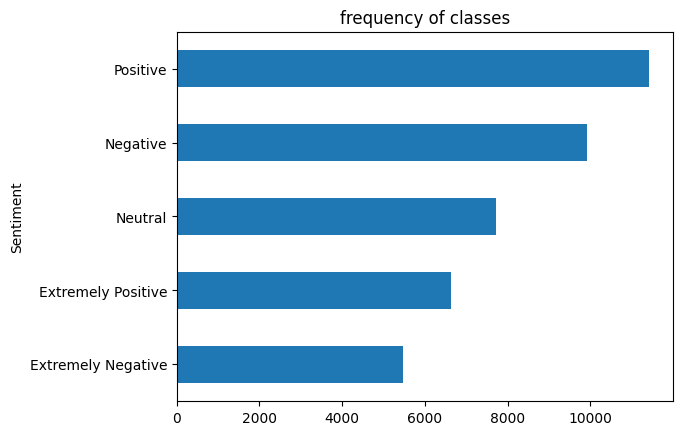

In [47]:
label_counts=df['Sentiment'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title('frequency of classes')
plt.show()

In [48]:
df['words_per_tweet']=df['OriginalTweet'].str.split().apply(len)
test['words_per_tweet']=test['OriginalTweet'].str.split().apply(len)

<Axes: title={'center': 'words_per_tweet'}, xlabel='Sentiment'>

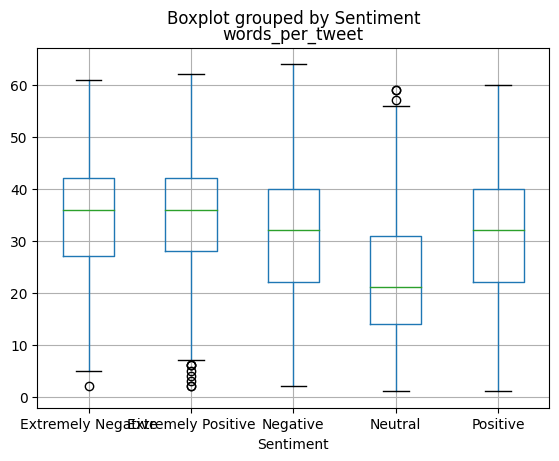

In [49]:
df.boxplot('words_per_tweet',by='Sentiment')

In [21]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [22]:
model_name='bert-base-cased'
tokenizer=AutoTokenizer.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [50]:
text="I am alex "

In [51]:
tokenizer(text)

{'input_ids': [101, 146, 1821, 23280, 1775, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [52]:
from sklearn.model_selection import train_test_split
train,val=train_test_split(df,test_size=0.2,random_state=42)

In [53]:
train.shape,val.shape,test.shape


((32925, 3), (8232, 3), (3798, 3))

In [54]:


# Define the function to add a label column
def add_label_column(df, class_column):
    # Mapping dictionary for class labels to numeric labels
    label_mapping = {
        'Positive': 0,
        'Negative': 1,
        'Neutral': 2,
        'Extremely Positive': 3,
        'Extremely Negative': 4
    }

    # Add a new column 'label' based on the mapping
    df['label'] = df[class_column].map(label_mapping)

    return df

In [55]:
add_label_column(train,'Sentiment')
add_label_column(val,'Sentiment')
add_label_column(test,'Sentiment')

,OriginalTweet,Sentiment,words_per_tweet,label
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,23,4
1,When I couldn't find hand sanitizer at Fred Me...,Positive,30,0
2,Find out how you can protect yourself and love...,Extremely Positive,13,3
3,#Panic buying hits #NewYork City as anxious sh...,Negative,37,1
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,26,2
...,...,...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive,18,0
3794,Did you panic buy a lot of non-perishable item...,Negative,34,1
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,26,2
3796,Gov need to do somethings instead of biar je r...,Extremely Negative,29,4


In [56]:
train.head()

,OriginalTweet,Sentiment,words_per_tweet,label
8191,Unemployment claims made online in Virginia th...,Negative,21,1
3725,Panic-buying in response to #Covid19 could hav...,Extremely Negative,24,4
22759,E-cigarette users and tobacco smokers are more...,Negative,21,1
15010,You just know that a YouTube prankster is goin...,Neutral,36,2
39142,"""Our appetite for meat has to change, but we a...",Extremely Negative,42,4


In [57]:
from datasets import Dataset,DatasetDict
dataset=DatasetDict(
    {
    'train':Dataset.from_pandas(train,preserve_index=False),
    'val':Dataset.from_pandas(val,preserve_index=False),
    'test':Dataset.from_pandas(test,preserve_index=False)
    }
)

In [58]:

dataset


DatasetDict({
    train: Dataset({
        features: ['OriginalTweet', 'Sentiment', 'words_per_tweet', 'label'],
        num_rows: 32925
    })
    val: Dataset({
        features: ['OriginalTweet', 'Sentiment', 'words_per_tweet', 'label'],
        num_rows: 8232
    })
    test: Dataset({
        features: ['OriginalTweet', 'Sentiment', 'words_per_tweet', 'label'],
        num_rows: 3798
    })
})

In [59]:
def tokenize(batch):
  return tokenizer(batch['OriginalTweet'],padding=True,truncation=True)

In [60]:
emotion_enocded=dataset.map(tokenize,batched=True,batch_size=None)

Map:   0%|          | 0/32925 [00:00<?, ? examples/s]

Map:   0%|          | 0/8232 [00:00<?, ? examples/s]

Map:   0%|          | 0/3798 [00:00<?, ? examples/s]

In [61]:
emotion_enocded

DatasetDict({
    train: Dataset({
        features: ['OriginalTweet', 'Sentiment', 'words_per_tweet', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 32925
    })
    val: Dataset({
        features: ['OriginalTweet', 'Sentiment', 'words_per_tweet', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 8232
    })
    test: Dataset({
        features: ['OriginalTweet', 'Sentiment', 'words_per_tweet', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3798
    })
})

In [62]:
label2id={'Positive':0,'Negative':1,'Neutral':2,'Extremely Positive':3,'Extremely Negative':4}
id2label={0:'Positive',1:'Negative',2:'Neutral',3:'Extremely Positive',4:'Extremely Negative'}

In [63]:
from transformers import AutoModel
import torch
model=AutoModel.from_pretrained(model_name)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [70]:
model.config.id2label

{0: 'LABEL_0', 1: 'LABEL_1'}

In [67]:
model.config

BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.45.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

In [76]:
from transformers import AutoModelForSequenceClassification,AutoConfig
Num_labels=len(label2id)
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
config=AutoConfig.from_pretrained(model_name,num_labels=Num_labels,id2label=id2label,label2id=label2id)

model=AutoModelForSequenceClassification.from_pretrained(model_name,config=config).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [78]:
model.config.label2id

{'Positive': 0,
 'Negative': 1,
 'Neutral': 2,
 'Extremely Positive': 3,
 'Extremely Negative': 4}

In [79]:
model.config

BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "Positive",
    "1": "Negative",
    "2": "Neutral",
    "3": "Extremely Positive",
    "4": "Extremely Negative"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Extremely Negative": 4,
    "Extremely Positive": 3,
    "Negative": 1,
    "Neutral": 2,
    "Positive": 0
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.45.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

In [91]:
from transformers import TrainingArguments
batch_size=64
num_epochs=4
lr=2e-5
training_dir='bert_train_dir'
training_args=TrainingArguments(
    output_dir=training_dir,
    learning_rate=lr,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    overwrite_output_dir=True,
    weight_decay=0.1,
    evaluation_strategy='epoch',


)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [92]:
!pip install evaluate

In [93]:
import evaluate
import numpy as np
metric=evaluate.load('accuracy')


def compute_metrics(eval_pred):
  logits,labels=eval_pred
  predictions=np.argmax(logits,axis=1)
  return metric.compute(predictions=predictions,references=labels)

In [94]:
from transformers import Trainer
trainer=Trainer(model=model,
                compute_metrics=compute_metrics,
                args=training_args,
                train_dataset=emotion_enocded['train'],
                eval_dataset=emotion_enocded['val'],
                tokenizer=tokenizer
                )

In [95]:
tokenizer

BertTokenizerFast(name_or_path='bert-base-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [96]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,1.000100,0.673941,0.748299
2,0.579500,0.528502,0.808916
3,0.425300,0.524005,0.817784
4,0.333400,0.513453,0.826652


TrainOutput(global_step=2060, training_loss=0.5771213633342854, metrics={'train_runtime': 5876.3464, 'train_samples_per_second': 22.412, 'train_steps_per_second': 0.351, 'total_flos': 1.692024382935e+16, 'train_loss': 0.5771213633342854, 'epoch': 4.0})

In [97]:
preds_output=trainer.predict(emotion_enocded['test'])

In [98]:
preds_output.metrics

{'test_loss': 0.5952140688896179,
 'test_accuracy': 0.8020010531858873,
 'test_runtime': 38.0424,
 'test_samples_per_second': 99.836,
 'test_steps_per_second': 1.577}

In [99]:
y_pred=np.argmax(preds_output.predictions,axis=1)
y_test=emotion_enocded['test'][:]['label']

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       947
           1       0.77      0.81      0.79      1041
           2       0.91      0.80      0.85       619
           3       0.83      0.83      0.83       599
           4       0.82      0.83      0.82       592

    accuracy                           0.80      3798
   macro avg       0.82      0.81      0.81      3798
weighted avg       0.80      0.80      0.80      3798



In [102]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [103]:
cm=confusion_matrix(y_test,y_pred)

<Axes: >

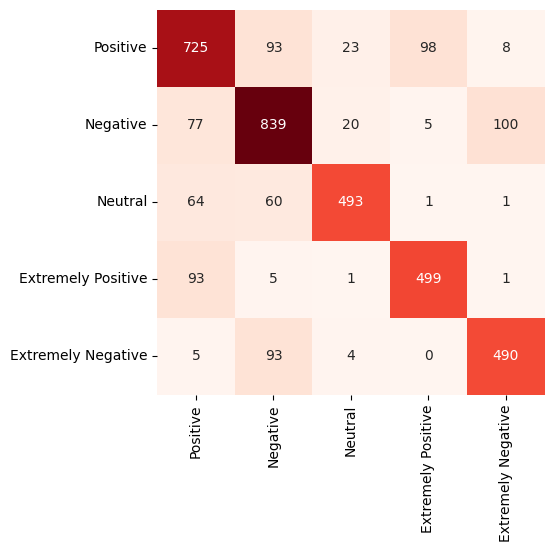

In [104]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,xticklabels=label2id.keys(),yticklabels=label2id.keys(),fmt='d',cbar=False,cmap='Reds')

In [110]:
text='''
 The COVID-19 pandemic has caused immense suffering and disruption. The constant uncertainty, loss of jobs, and overwhelming grief are taking a serious toll on everyone.
 It's hard to see any light at the end of this tunnel
'''

In [111]:
encoded_text=tokenizer(text,return_tensors='pt').to(device)
with torch.no_grad():
    output=model(**encoded_text)
logits=output.logits
pred=torch.argmax(logits,dim=1)
pred.item(),id2label[pred.item()]

(4, 'Extremely Negative')